# Machine Learning based Natural Language Processing

In this notebook we will cover topics from the large lecture block on getting from a text corpora to their representation, running experiments on them and evaluating the results.

## Word Embedding

In natural language processing, it's essential to represent words in a way that machines can understand and process.
Word embeddings are dense, low-dimensional vectors where words with similar meanings have similar vector representations. Models like Word2Vec, GloVe, and FastText learn these embeddings by analyzing large text corpora and capturing relationships based on context and co-occurrence.

In [ ]:
# We’ll use Gensim, a popular Python library for working with word embeddings like Word2Vec and GloVe
!pip uninstall -y numpy
!pip install numpy==1.26.4 --force-reinstall
!pip install gensim

In [6]:
import gensim
import gensim.downloader as api

In [7]:
# Load pre-trained embedding model
model = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [8]:
# Find the closest 10 words to the embedding vector of "Spain"
model.similar_by_vector(model['spain'], topn=10)

[('spain', 1.0000001192092896),
 ('spanish', 0.7018521428108215),
 ('portugal', 0.6837542653083801),
 ('madrid', 0.620792806148529),
 ('morocco', 0.5984663367271423),
 ('argentina', 0.5970551371574402),
 ('italy', 0.5794763565063477),
 ('france', 0.573593258857727),
 ('barcelona', 0.5564865469932556),
 ('valencia', 0.5475436449050903)]

In [9]:
# Word embeddings capture semantic relationships between words, which allows us
# to perform vector arithmetic to uncover analogies like
# Spain - Madrid + Paris = France
new_vector = model['spain'] - model['madrid'] + model['paris']
model.similar_by_vector(new_vector, topn=10)

[('france', 0.7788554430007935),
 ('paris', 0.6755749583244324),
 ('french', 0.6073658466339111),
 ('spain', 0.6002401113510132),
 ('belgium', 0.5509710907936096),
 ('prohertrib', 0.5404819250106812),
 ('europe', 0.5105735063552856),
 ('britain', 0.4912627339363098),
 ('italy', 0.4869527220726013),
 ('greece', 0.4622404873371124)]

In [10]:
new_vector = model['spain'] - model['madrid'] + model['berlin']
model.similar_by_vector(new_vector, topn=10)

[('germany', 0.7243330478668213),
 ('berlin', 0.6511070132255554),
 ('german', 0.5675503611564636),
 ('austria', 0.5670680999755859),
 ('poland', 0.542432963848114),
 ('spain', 0.5124937891960144),
 ('europe', 0.496069997549057),
 ('belgium', 0.4838774502277374),
 ('britain', 0.4805854856967926),
 ('hungary', 0.4778807461261749)]

In [11]:
new_vector = model['king'] - model['man'] + model['woman']
print(model.similar_by_vector(new_vector, topn=10))

[('king', 0.8065858483314514), ('queen', 0.689616322517395), ('monarch', 0.5575491189956665), ('throne', 0.5565375089645386), ('princess', 0.5518684387207031), ('mother', 0.5142154693603516), ('daughter', 0.5133156776428223), ('kingdom', 0.5025345087051392), ('prince', 0.5017741322517395), ('elizabeth', 0.4908031225204468)]


### Clustering word embeddings

Word embeddings represent words as dense vectors in a high-dimensional space, where semantic similarity is reflected in geometric proximity. That means words with similar meanings tend to be close together in this space.

In [13]:
# Let's collect a set of diseases and their respective classes to showcase the
# semantic clustering

model_words = [
    ("asthma", "lungs"),
    ("bronchitis", "lungs"),
    ("emphysema", "lungs"),
    ("tuberculosis", "lungs"),
    ("apnea", "lungs"),
    ("influenza", "lungs"),
    ("arrhythmia", "heart"),
    ("myocarditis", "heart"),
    ("angina", "heart"),
    ("hypertension", "heart"),
    ("epilepsy", "brain"),
    ("migraine", "brain"),
    ("meningitis", "brain"),
    ("parkinson", "brain"),
    ("alzheimer", "brain"),
    ("stroke", "brain"),
    ("gastritis", "intestine"),
    ("ulcer", "intestine"),
    ("gastroenteritis", "intestine"),
    ("colitis", "intestine"),
    ("dermatitis", "skin"),
    ("acne", "skin"),
    ("cellulitis", "skin"),
    ("melanoma", "skin"),
    ("herpes", "skin"),
    ("warts", "skin"),
    ("glaucoma", "eyes"),
    ("conjunctivitis", "eyes"),
    ("myopia", "eyes"),
    ("hyperopia", "eyes"),
    ("astigmatism", "eyes"),
    ("retinopathy", "eyes"),
]

classes = list(set([w[1] for w in model_words]))
classes

['skin', 'heart', 'eyes', 'brain', 'intestine', 'lungs']

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7eee25a15e40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


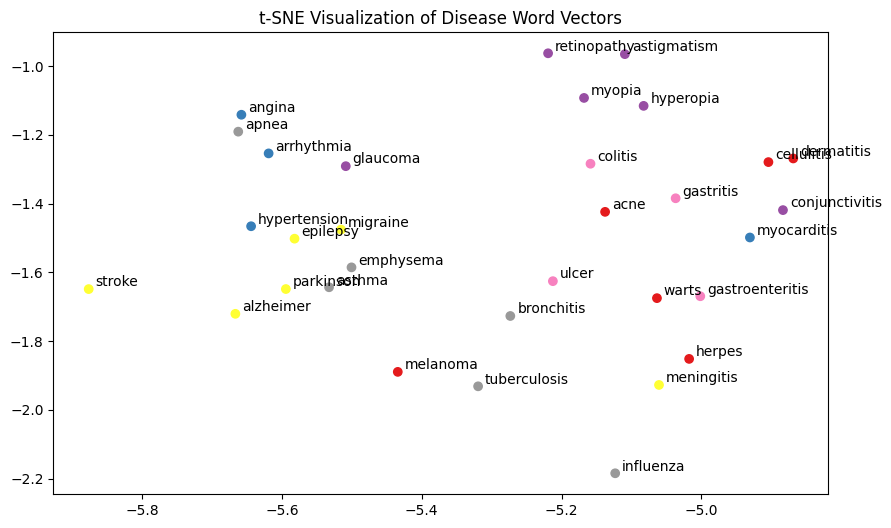

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Extract word embeddings
word_vectors = np.array([model[word[0]] for word in model_words])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=4)
reduced_vectors = tsne.fit_transform(X=word_vectors)

# Plot in 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=[classes.index(clz) for _, clz in model_words], cmap='Set1')
for i, (word, clazz) in enumerate(model_words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]),
                     xytext=(5, 2), textcoords='offset points')
plt.title('t-SNE Visualization of Disease Word Vectors')
plt.show()

We can examine that diseases of similar classes tend to be grouped closer together.

## Subword Tokenizing

Traditional tokenization splits text into whole words, which can cause problems when a word is unknown to the model (e.g., rare words, typos, and new terms).

Subword tokenization solves this by breaking words into smaller units (subwords), such as prefixes, suffixes, or syllables.

In the following we will apply Byte Pair Encoding (BPE) as shown in the lecture.

In [15]:
import re, collections

# Count number of pairs
def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

# Merge most frequent pairs in the vocabulary
def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

# Vocab as seen in the lecture example
lecture_vocab = {'b i g </w>' : 1, 'b i g g e r </w>' : 1,
'b i g g e s t </w>':1, 'b i t </w>' : 1, 'b i g f o o t </w>' : 1,}

# Another simplified vocabulary, which you've might collected from a real-word text corpus
example_vocab = {'l o w </w>' : 5, 'l o w e r </w>' : 2,
'n e w e s t </w>':6, 'w i d e s t </w>' : 3}

# Applying BPE until 5 iterations have passed
num_merges = 5
for vocab in [lecture_vocab, example_vocab]:
  for i in range(num_merges):
      pairs = get_stats(vocab)
      best = max(pairs, key=pairs.get)
      vocab = merge_vocab(best, vocab)
      print(best)
  print(vocab)
  print("="*80)

('b', 'i')
('bi', 'g')
('t', '</w>')
('big', 'g')
('bigg', 'e')
{'big </w>': 1, 'bigge r </w>': 1, 'bigge s t</w>': 1, 'bi t</w>': 1, 'big f o o t</w>': 1}
('e', 's')
('es', 't')
('est', '</w>')
('l', 'o')
('lo', 'w')
{'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


In [16]:
# Here, we will use an already pre-trained tokenizer to showcase the usage of
# Subword tokenizing
import tiktoken
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [17]:
# Example as seen in the lecture
token_ids = enc.encode('unbelievable')
[enc.decode([i]) for i in token_ids]

['un', 'belie', 'vable']

In [18]:
# We can now tokenize rare words
token_ids = enc.encode('acetaminophen')
[enc.decode([i]) for i in token_ids]

['acet', 'amin', 'oph', 'en']

In [19]:
# This can also work for words of foreign languages as we can default to a
# character lever
token_ids = enc.encode('tränenüberströmt')
[enc.decode([i]) for i in token_ids]

['tr', 'ä', 'nen', 'über', 'str', 'ö', 'mt']

## Text Encoding

Here, we will showcase some of the common text encoding methods as show in the lecture:
- One-Hot Encoding: Represents each word as a binary vector with a single 1 — simple, but doesn't capture meaning or relationships.

- Bag of Words (BoW): Counts how often each word appears in a document, ignoring grammar and word order.

- N-Grams: Extends BoW by capturing sequences of n words (e.g., bigrams like “machine learning”) to include some local word order.

In [20]:
# Install required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Sample dataset
texts = [
    "The nurse helps the doctor",
    "The nurse treats the patient",
    "Patient of the doctor"
]

# Display original text data
df = pd.DataFrame({"text": texts})
df

,text
0,The nurse helps the doctor
1,The nurse treats the patient
2,Patient of the doctor


### One-Hot Encoding

In [21]:
# Split each sentence into words (naive tokenization)
words = list(set(word for sentence in texts for word in sentence.lower().split()))
print("Unique words:", words)

# Create one-hot encoding for the presence of words
onehot_df = pd.DataFrame([[1 if word in sentence.lower().split() else 0 for word in words] for sentence in texts], columns=words)
onehot_df

Unique words: ['of', 'nurse', 'patient', 'treats', 'helps', 'the', 'doctor']


,of,nurse,patient,treats,helps,the,doctor
0,0,1,0,0,1,1,1
1,0,1,1,1,0,1,0
2,1,0,1,0,0,1,1


### Bag of Words

In [22]:
# Using CountVectorizer to generate BoW representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(texts)

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,doctor,helps,nurse,of,patient,the,treats
0,1,1,1,0,0,2,0
1,0,0,1,0,1,2,1
2,1,0,0,1,1,1,0


### N-Grams

In [23]:
# Generate bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_vectorizer.fit(texts)
bigrams = bigram_vectorizer.get_feature_names_out().tolist()

print("Bigrams:")
print(bigrams)

# Generate trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_vectorizer.fit(texts)
trigrams = trigram_vectorizer.get_feature_names_out().tolist()

print("\nTrigrams:")
print(trigrams)

Bigrams:
['helps the', 'nurse helps', 'nurse treats', 'of the', 'patient of', 'the doctor', 'the nurse', 'the patient', 'treats the']

Trigrams:
['helps the doctor', 'nurse helps the', 'nurse treats the', 'of the doctor', 'patient of the', 'the nurse helps', 'the nurse treats', 'treats the patient']


## NLP Architectures

In the following we will explore how Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs) work and compare their strengths on sequence data.

- RNNs are specialized neural networks designed to handle sequential data, like sentences or time series, by maintaining a “memory” of previous inputs. However, standard RNNs struggle with learning long-range dependencies due to the vanishing gradient problem.

- LSTMs improve on RNNs by using gating mechanisms to better remember important information over longer sequences (in a kind of long term memory). This makes LSTMs powerful for tasks like language modeling, translation, and speech recognition.

In [24]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
# We will train an RNN and LSTM for sentiment analysis.
# Note: This is a tiny dataset, the goal is demonstration, not performance)
texts = [
    "I love deep learning",
    "Deep learning is amazing",
    "I hate waiting in traffic",
    "Traffic jams are frustrating",
    "Machine learning is fascinating",
    "I dislike delays"
]

labels = [1, 1, 0, 0, 1, 0]  # 1 = positive sentiment, 0 = negative

In [26]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

# Pad sequences
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

Vocabulary size: 17


In [27]:
# Build a simple RNN model
rnn_model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=8, input_length=max_len),
    SimpleRNN(16),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

rnn_model.fit(X, y, epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.7126
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3333 - loss: 0.7043
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6963
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6885
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6810
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6736
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8333 - loss: 0.6663
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8333 - loss: 0.6590
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8333 - loss: 0.6517
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.6443


In [28]:
# Build a simple LSTM model
lstm_model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=8, input_length=max_len),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

lstm_model.fit(X, y, epochs=10, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.6940
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5000 - loss: 0.6935
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6667 - loss: 0.6930
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8333 - loss: 0.6924
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8333 - loss: 0.6919
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8333 - loss: 0.6913
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.6908
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 0.6902
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.6896
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.6889


In [29]:
# Test the model on a test sentence with negative sentiment
test_text = ["I dislike traffic"]
test_seq = tokenizer.texts_to_sequences(test_text)
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post')

rnn_pred = rnn_model.predict(test_pad)
lstm_pred = lstm_model.predict(test_pad)

print("RNN prediction on the short text:", rnn_pred)
print("LSTM prediction on the short text:", lstm_pred)

# Now follow up with many neutral or misleading words
test_text_long = ["I dislike traffic, even though the sky was blue, the sun was shining, birds were chirping, people were smiling, children were playing, music was playing in the background, the roads were lined with trees, cafes were open, the scent of coffee filled the air, people were jogging, cars were honking, buses were moving, the day felt alive, the world felt kind."]
test_seq_long = tokenizer.texts_to_sequences(test_text_long)
test_pad_long = pad_sequences(test_seq_long, maxlen=max_len, padding='post')

rnn_pred_long = rnn_model.predict(test_pad_long)
lstm_pred_long = lstm_model.predict(test_pad_long)

print("RNN prediction on the long text:", rnn_pred_long)
print("LSTM prediction on the long text:", lstm_pred_long)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
RNN prediction on the short text: [[0.4845889]]
LSTM prediction on the short text: [[0.49724454]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RNN prediction on the long text: [[0.47049475]]
LSTM prediction on the long text: [[0.49753907]]


As you can see, with the longer input sentence in which the relevant information is at the beginning, the RNN shows some difficulties in understanding the actual meaning (Output is between 0 and 1 with 1 = full positive sentiment, 0 = full negative sentiment)

## Evaluation Metrics

Evaluating how well a model’s text output matches a reference is crucial in NLP tasks like translation and summarization. Three common metrics are:

- BLEU (Bilingual Evaluation Understudy): Measures overlap of n-grams between candidate and reference, focusing on precision.

- ROUGE (Recall-Oriented Understudy for Gisting Evaluation): Focuses on recall of overlapping units like n-grams and longest common subsequences, often used for summarization.

- WER (Word Error Rate): Calculates the minimum number of word-level edits (insertions, deletions, substitutions) needed to convert a candidate to a reference — commonly used in speech recognition.

In [ ]:
# Install required libraries
!pip install rouge-score
!pip install jiwer

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from jiwer import wer

nltk.download('punkt_tab', force=True)

In [31]:
# Reference and candidate (predicted) sentences
reference = "The quick brown fox jumps over the lazy dog"
candidate = "The quick brown fox jumped over a lazy dog"

# Tokenized versions
ref_tokens = [nltk.word_tokenize(reference)]
can_tokens = nltk.word_tokenize(candidate)

### BLEU

In [32]:
# Calculate BLEU score (1-gram to 4-gram)
smooth_fn = SmoothingFunction().method1
bleu_score = sentence_bleu(ref_tokens, can_tokens, smoothing_function=smooth_fn)

print("BLEU Score:", round(bleu_score, 4))

BLEU Score: 0.3689


### ROUGE

In [33]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = scorer.score(reference, candidate)

# Display selected ROUGE scores
for key, score in rouge_scores.items():
    print(f"{key.upper()}: Precision={score.precision:.4f}, Recall={score.recall:.4f}, F1={score.fmeasure:.4f}")

ROUGE1: Precision=0.8889, Recall=0.8889, F1=0.8889
ROUGE2: Precision=0.7500, Recall=0.7500, F1=0.7500
ROUGEL: Precision=0.8889, Recall=0.8889, F1=0.8889


### WER

In [34]:
# WER is the number of word-level errors / total words in reference
wer_score = wer(reference, candidate)
print("Word Error Rate (WER):", round(wer_score, 4))

Word Error Rate (WER): 0.2222
